<a href="https://colab.research.google.com/github/soumik12345/nerf.jax/blob/main/nerf_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q -U flax jax jaxlib wget
!git clone https://github.com/soumik12345/nerf.jax

     |████████████████████████████████| 207 kB 5.2 MB/s 
     |████████████████████████████████| 850 kB 64.6 MB/s 
     |████████████████████████████████| 62.2 MB 237 kB/s 
     |████████████████████████████████| 126 kB 71.0 MB/s 
     |████████████████████████████████| 65 kB 4.2 MB/s 
Cloning into 'nerf.jax'...
remote: Enumerating objects: 55, done.
remote: Counting objects: 100% (55/55), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 55 (delta 24), reused 43 (delta 12), pack-reused 0
Unpacking objects: 100% (55/55), done.


In [1]:
import os
import sys
sys.path.append("nerf.jax")
from base64 import b64encode
from IPython.display import HTML
from matplotlib import pyplot as plt

from nerf.train import NeRFSystem
from nerf.utils import load_lego_data

os.mkdir("checkpoints")

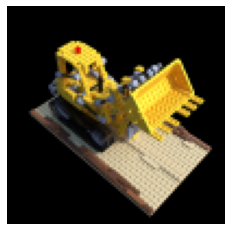

In [2]:
(
    train_images, train_poses,
    test_image, test_pose, focal,
    image_height, image_width
) = load_lego_data()

plt.imshow(test_image)
plt.axis("off")
plt.show()

[TpuDevice(id=0, process_index=0, coords=(0,0,0), core_on_chip=0), TpuDevice(id=1, process_index=0, coords=(0,0,0), core_on_chip=1), TpuDevice(id=2, process_index=0, coords=(1,0,0), core_on_chip=0), TpuDevice(id=3, process_index=0, coords=(1,0,0), core_on_chip=1), TpuDevice(id=4, process_index=0, coords=(0,1,0), core_on_chip=0), TpuDevice(id=5, process_index=0, coords=(0,1,0), core_on_chip=1), TpuDevice(id=6, process_index=0, coords=(1,1,0), core_on_chip=0), TpuDevice(id=7, process_index=0, coords=(1,1,0), core_on_chip=1)]


 10%|▉         | 99/1000 [00:31<03:55,  3.83it/s]

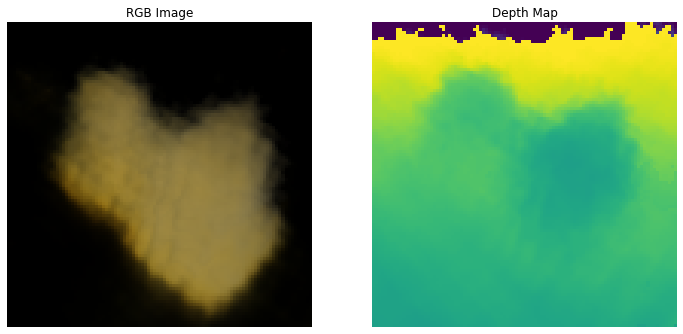

 20%|█▉        | 199/1000 [00:59<03:29,  3.82it/s]

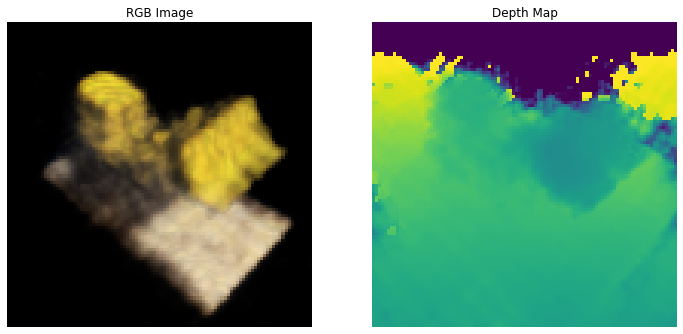

 30%|██▉       | 299/1000 [01:26<03:12,  3.65it/s]

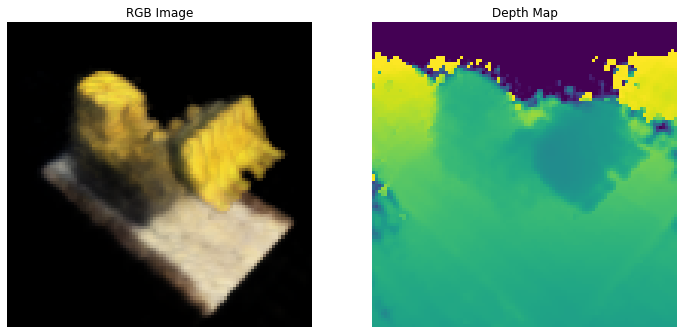

 40%|███▉      | 399/1000 [01:53<02:40,  3.75it/s]

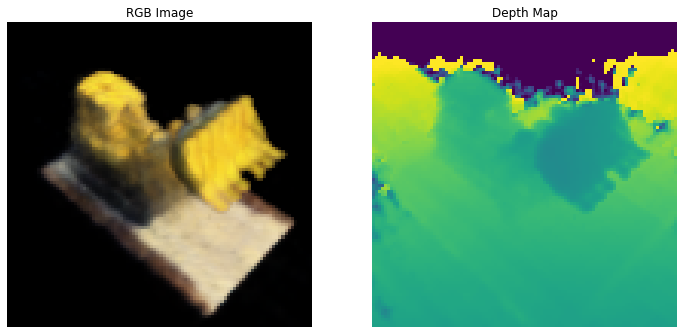

 50%|████▉     | 499/1000 [02:20<02:12,  3.79it/s]

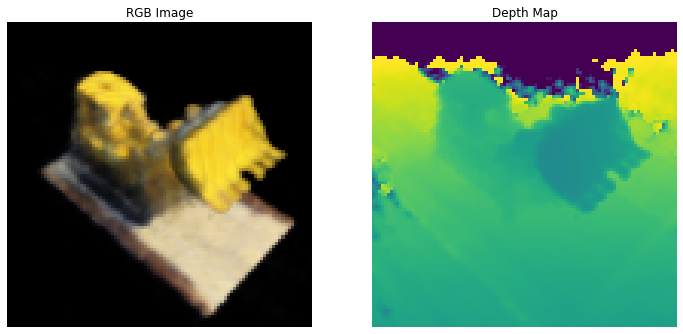

 60%|█████▉    | 599/1000 [02:47<01:49,  3.66it/s]

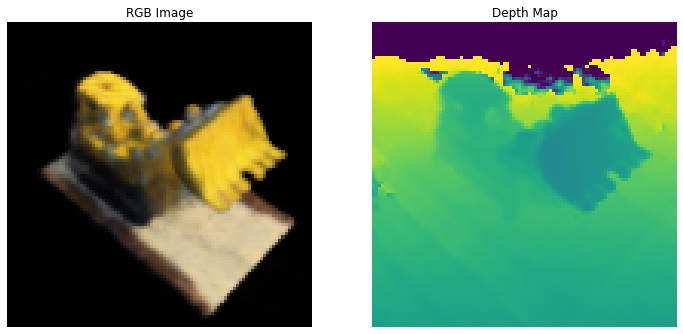

 70%|██████▉   | 699/1000 [03:14<01:20,  3.76it/s]

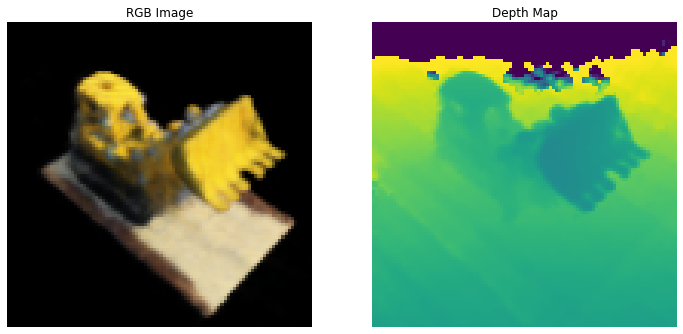

 80%|███████▉  | 799/1000 [03:41<00:53,  3.75it/s]

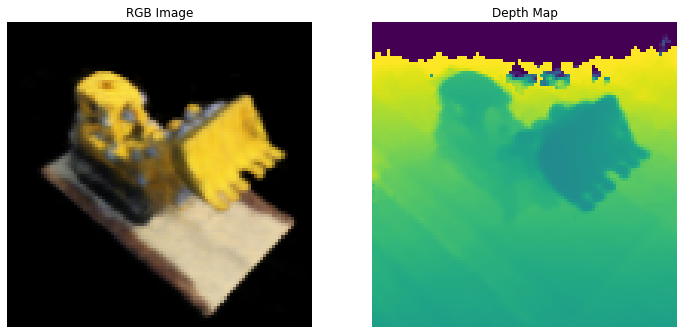

 90%|████████▉ | 899/1000 [04:09<00:27,  3.63it/s]

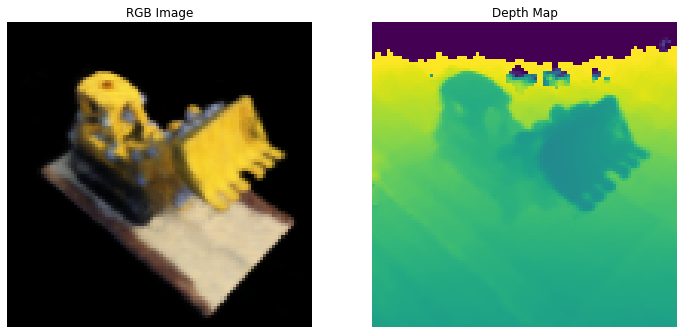

100%|█████████▉| 999/1000 [04:37<00:00,  3.43it/s]

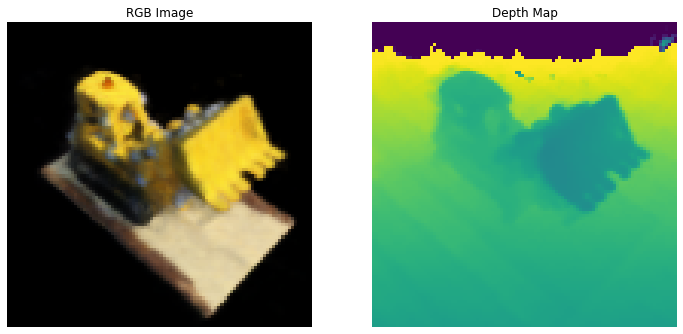

100%|██████████| 1000/1000 [04:38<00:00,  3.59it/s]


In [3]:
nerf_system = NeRFSystem(train_images.shape[1], train_images.shape[2], focal)
nerf_system.compile(5e-4, train_poses, test_pose)
nerf_system.train(train_images, test_image, 1000, 100)

In [4]:
nerf_system.load()
nerf_system.render_video()

Loaded checkpoints successfully


In [5]:
mp4 = open("rgb.mp4", "rb").read()
data_url = f"data:video/mp4;base64,{b64encode(mp4).decode()}"
HTML(
    """
<video width=500 controls autoplay loop>
      <source src="%s" type="video/mp4">
</video>
"""
    % data_url
)

In [6]:
mp4 = open("depth.mp4", "rb").read()
data_url = f"data:video/mp4;base64,{b64encode(mp4).decode()}"
HTML(
    """
<video width=500 controls autoplay loop>
      <source src="%s" type="video/mp4">
</video>
"""
    % data_url
)